In [ ]:
pip install Turicreate

In [2]:
import re
import turicreate as tc
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import string
import random

In [3]:
fashion_data = tc.SFrame.read_json('/content/drive/My Drive/fashion.json',orient='lines')

Finished parsing file /content/drive/My Drive/fashion.json

Parsing completed. Parsed 100 lines in 3.76747 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[dict]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/fashion.json

Parsing completed. Parsed 8460 lines in 0.658138 secs.

In [4]:
fashion_data

Clothing,Dining,Health,Home,Household,Jewelry,Kitchen,Office,Outdoors,ProdID,Products
1,0,0,0,0,1,0,0,0,B00ZJD3FTG,0
1,0,0,0,0,1,0,0,0,B01EYPV8FW,0
1,0,0,0,0,1,0,0,0,B00SK8HAOI,0
1,0,0,0,0,1,0,0,0,B011QEG1GK,0
1,0,0,0,0,1,0,0,0,B01CGX3W8U,0
1,0,0,0,0,1,0,0,0,B0148B7EJ6,0
0,0,0,0,0,0,0,0,1,B01761SMW8,0
1,0,0,0,0,1,0,0,0,B00D5EM1TQ,0
1,0,0,0,0,1,0,0,0,B00CC3E6BC,0
1,0,0,0,0,1,0,0,0,B01HIX20DQ,0


In [5]:
x = fashion_data[fashion_data['Rank'] != 'missing']
v = x['Rank'].astype(int)
v.mean()

3188137.9593338976

In [6]:
def Filtering_rank(s):
  if s == 'missing':
    return 3188137
  return int(s)
def Filtering_brand(s):
  if s.lower() == '' or s.lower() == 'unknown':
    return 'Unknown'
  return s

In [7]:
fashion_data['Rank'] = fashion_data['Rank'].apply(Filtering_rank)
fashion_data['brand'] = fashion_data['brand'].apply(Filtering_brand)

In [8]:
fashion_data

Clothing,Dining,Health,Home,Household,Jewelry,Kitchen,Office,Outdoors,ProdID,Products
1,0,0,0,0,1,0,0,0,B00ZJD3FTG,0
1,0,0,0,0,1,0,0,0,B01EYPV8FW,0
1,0,0,0,0,1,0,0,0,B00SK8HAOI,0
1,0,0,0,0,1,0,0,0,B011QEG1GK,0
1,0,0,0,0,1,0,0,0,B01CGX3W8U,0
1,0,0,0,0,1,0,0,0,B0148B7EJ6,0
0,0,0,0,0,0,0,0,1,B01761SMW8,0
1,0,0,0,0,1,0,0,0,B00D5EM1TQ,0
1,0,0,0,0,1,0,0,0,B00CC3E6BC,0
1,0,0,0,0,1,0,0,0,B01HIX20DQ,0


In [9]:
def remove_punctuation(text):
    translator = text.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

In [10]:
Title_without_punctuation = fashion_data['title'].apply(remove_punctuation)
Description_without_punctuation = fashion_data['description'].apply(remove_punctuation)
fashion_data['title_word_count'] = tc.text_analytics.count_words(Title_without_punctuation)
fashion_data['title_tf_idf'] = tc.text_analytics.tf_idf(Title_without_punctuation)
fashion_data['description_word_count'] = tc.text_analytics.count_words(Description_without_punctuation)
fashion_data['description_tf_idf'] = tc.text_analytics.tf_idf(Description_without_punctuation)

In [11]:
fashion_data

Clothing,Dining,Health,Home,Household,Jewelry,Kitchen,Office,Outdoors,ProdID,Products
1,0,0,0,0,1,0,0,0,B00ZJD3FTG,0
1,0,0,0,0,1,0,0,0,B01EYPV8FW,0
1,0,0,0,0,1,0,0,0,B00SK8HAOI,0
1,0,0,0,0,1,0,0,0,B011QEG1GK,0
1,0,0,0,0,1,0,0,0,B01CGX3W8U,0
1,0,0,0,0,1,0,0,0,B0148B7EJ6,0
0,0,0,0,0,0,0,0,1,B01761SMW8,0
1,0,0,0,0,1,0,0,0,B00D5EM1TQ,0
1,0,0,0,0,1,0,0,0,B00CC3E6BC,0
1,0,0,0,0,1,0,0,0,B01HIX20DQ,0


In [12]:
fashion_data.remove_columns(['tf_idf','tf_idf_description'],inplace=True)

Clothing,Dining,Health,Home,Household,Jewelry,Kitchen,Office,Outdoors,ProdID,Products
1,0,0,0,0,1,0,0,0,B00ZJD3FTG,0
1,0,0,0,0,1,0,0,0,B01EYPV8FW,0
1,0,0,0,0,1,0,0,0,B00SK8HAOI,0
1,0,0,0,0,1,0,0,0,B011QEG1GK,0
1,0,0,0,0,1,0,0,0,B01CGX3W8U,0
1,0,0,0,0,1,0,0,0,B0148B7EJ6,0
0,0,0,0,0,0,0,0,1,B01761SMW8,0
1,0,0,0,0,1,0,0,0,B00D5EM1TQ,0
1,0,0,0,0,1,0,0,0,B00CC3E6BC,0
1,0,0,0,0,1,0,0,0,B01HIX20DQ,0


In [13]:
def price_normalization(n):
  return np.log1p(n)

In [14]:
fashion_data['price'] = fashion_data['price'].apply(price_normalization)

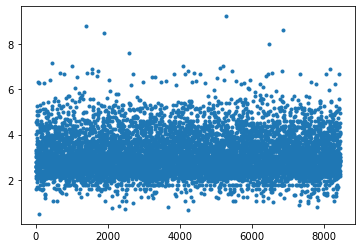

In [15]:
%matplotlib inline
plt.plot(fashion_data['price'],'.')
        

In [16]:
train_validation,test = fashion_data.random_split(.9,seed=0)



In [17]:
features = ['Clothing',
 'Dining',
 'Health',
 'Home',
 'Household',
 'Jewelry',
 'Kitchen',
 'Office',
 'Outdoors',
 'Products',
 'Rank',
 'Shoes',
 'Sports',
 'brand',
 'rating',
 'title_tf_idf',
 'description_tf_idf']

In [18]:
Linear_model= tc.linear_regression.create(train_validation,target='price',features=features,
                                                l1_penalty=0.0,l2_penalty=2636,
                                                validation_set='auto',max_iterations = 1000,lbfgs_memory_level = 100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 7226

Number of features          : 17

Number of unpacked features : 34942

Number of coefficients    : 37206

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 5        | 0.095438  | 1.205069     | 7.602256           | 5.193558             | 1.983447                        | 2.157383                          |

| 1         | 9        | 2.004199  | 1.351120     | 6.931609           | 5.854660             | 1.488019                        | 1.773426                          |

| 2         | 14       | 1.701266  | 1.528139     | 4.977638           | 5.176443             | 0.988101                        | 1.418814                          |

| 3         | 15       | 1.701266  | 1.592007     | 4.564800           | 4.435246             | 0.737139                        | 1.197147                          |

| 4         | 17       | 1.450102  | 1.687987     | 5.552566           | 4.286909             | 0.567148                        | 1.129729                          |

| 9         | 32       | 1.026772  | 2.315959     | 3.075442           | 4.402744             | 0.272027                        | 1.071976                          |

| 24        | 49       | 1.000000  | 3.306474     | 1.922633           | 3.933686             | 0.154380                        | 0.992316                          |

| 49        | 87       | 1.000000  | 5.323417     | 1.929382           | 2.955229             | 0.127348                        | 0.616264                          |

| 74        | 123      | 0.931069  | 7.418137     | 1.952438           | 2.957938             | 0.126890                        | 0.615239                          |

| 99        | 176      | 1.000000  | 10.011264    | 1.953253           | 2.957833             | 0.126895                        | 0.615201                          |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [19]:
Linear_model.evaluate(test)

{'max_error': 2.9025665576909985, 'rmse': 0.5655950299472452}

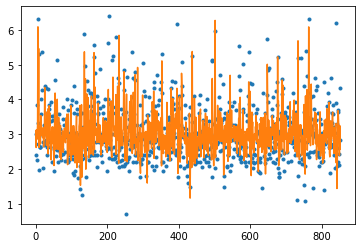

In [20]:
%matplotlib inline
plt.plot(test['price'],'.',
        Linear_model.predict(test),'-')

In [21]:
test['price'][:10]

dtype: float
Rows: 10
[2.995732273553991, 2.3969857684155302, 3.849083205654272, 2.9439125248241944, 2.2502386126218363, 3.3141860046725258, 6.307187279715285, 2.70805020110221, 5.30325515557766, 1.9615022438151495]

In [22]:
Linear_model.predict(test[:10])

dtype: float
Rows: 10
[3.0905648302495043, 2.61927179238854, 3.131618793714366, 2.8558029450352147, 3.013336802639607, 3.2750462415093167, 6.090248619507376, 2.89921936274237, 5.46680435585384, 2.6236051792813146]

#Random Forest Regression

In [64]:
RandomForest_model = tc.random_forest_regression.create(train_validation,target='price',features=features,max_iterations=200,
                                                        validation_set='auto',max_depth = 100,verbose='True',min_loss_reduction=0.1)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest regression:

--------------------------------------------------------

Number of examples          : 7226

Number of features          : 17

Number of unpacked features : 34990

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 0.607362     | 5.389675           | 4.635104             | 0.634479                        | 0.820329                          |

| 2         | 1.318201     | 5.144420           | 4.389849             | 0.581859                        | 0.754185                          |

| 3         | 1.981895     | 5.421471           | 4.461241             | 0.561902                        | 0.720678                          |

| 4         | 2.660663     | 5.365680           | 4.610865             | 0.546458                        | 0.711547                          |

| 5         | 3.302771     | 5.337425           | 4.582659             | 0.540345                        | 0.694918                          |

| 10        | 6.354945     | 5.304332           | 4.687818             | 0.522275                        | 0.677324                          |

| 15        | 9.532891     | 5.443393           | 4.698138             | 0.517597                        | 0.668970                          |

| 20        | 12.752796    | 5.499438           | 4.737313             | 0.512970                        | 0.658894                          |

| 25        | 15.838642    | 5.472897           | 4.712283             | 0.513282                        | 0.655326                          |

| 30        | 19.115658    | 5.469393           | 4.749133             | 0.511546                        | 0.653464                          |

| 35        | 22.409341    | 5.480412           | 4.723543             | 0.510295                        | 0.654600                          |

| 40        | 25.480801    | 5.495638           | 4.710030             | 0.510606                        | 0.655971                          |

| 45        | 28.724085    | 5.477886           | 4.699485             | 0.509968                        | 0.652079                          |

| 50        | 31.827020    | 5.461627           | 4.685608             | 0.509806                        | 0.651762                          |

| 55        | 34.934470    | 5.414806           | 4.688541             | 0.509269                        | 0.650588                          |

| 60        | 38.047181    | 5.441226           | 4.712606             | 0.508801                        | 0.650687                          |

| 65        | 41.123349    | 5.405721           | 4.707322             | 0.507775                        | 0.650026                          |

| 70        | 44.251934    | 5.386950           | 4.706994             | 0.507328                        | 0.648967                          |

| 75        | 47.235160    | 5.391953           | 4.712927             | 0.506689                        | 0.647647                          |

| 80        | 50.420877    | 5.400650           | 4.729342             | 0.506636                        | 0.647694                          |

| 85        | 53.536199    | 5.373439           | 4.727253             | 0.506544                        | 0.647296                          |

| 90        | 56.766703    | 5.369997           | 4.719112             | 0.506491                        | 0.647391                          |

| 95        | 60.156061    | 5.374762           | 4.715336             | 0.506150                        | 0.646357                          |

| 100       | 63.138947    | 5.361140           | 4.718155             | 0.505833                        | 0.646424                          |

| 105       | 66.441016    | 5.369627           | 4.724397             | 0.505510                        | 0.645929                          |

| 110       | 69.693168    | 5.368334           | 4.718133             | 0.505685                        | 0.646079                          |

| 115       | 72.692187    | 5.378999           | 4.718501             | 0.505520                        | 0.645600                          |

| 120       | 75.797156    | 5.381196           | 4.716778             | 0.505590                        | 0.645308                          |

| 125       | 78.945489    | 5.395413           | 4.716383             | 0.505537                        | 0.645112                          |

| 130       | 82.085513    | 5.392416           | 4.710481             | 0.505865                        | 0.645181                          |

| 135       | 85.362035    | 5.396521           | 4.706436             | 0.505925                        | 0.645464                          |

| 140       | 88.339719    | 5.395854           | 4.703466             | 0.505976                        | 0.645530                          |

| 145       | 91.484376    | 5.396286           | 4.701754             | 0.505918                        | 0.645249                          |

| 150       | 94.769377    | 5.393547           | 4.707239             | 0.505491                        | 0.645196                          |

| 155       | 97.690290    | 5.388647           | 4.700137             | 0.505372                        | 0.644732                          |

| 160       | 100.997925   | 5.393865           | 4.703291             | 0.505325                        | 0.643882                          |

| 165       | 104.078118   | 5.396965           | 4.702186             | 0.505343                        | 0.644116                          |

| 170       | 107.341727   | 5.394858           | 4.698321             | 0.505591                        | 0.643984                          |

| 175       | 110.407942   | 5.397285           | 4.704286             | 0.505579                        | 0.643745                          |

| 180       | 113.753656   | 5.405258           | 4.712170             | 0.505541                        | 0.644306                          |

| 185       | 116.698083   | 5.402157           | 4.707407             | 0.505554                        | 0.644583                          |

| 190       | 119.810611   | 5.403413           | 4.707088             | 0.505663                        | 0.645473                          |

| 195       | 123.193940   | 5.404960           | 4.715537             | 0.505591                        | 0.645587                          |

| 200       | 126.351646   | 5.406387           | 4.715336             | 0.505626                        | 0.645318                          |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [65]:
RandomForest_model.evaluate(test)

{'max_error': 2.580805778503418, 'rmse': 0.6042086323744631}

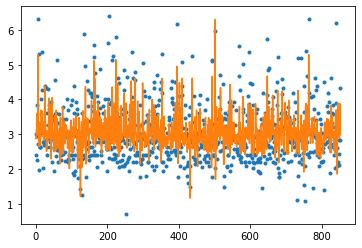

In [27]:
%matplotlib inline
plt.plot(test['price'],'.',
        RandomForest_model.predict(test),'-')